In [1]:
from google.colab import drive

In [2]:
drive.mount('content')

Mounted at content


In [3]:



import os
os.getcwd()

'/content'

In [4]:
os.chdir('/content/content/MyDrive/HAR')

In [5]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, GRU
from keras.optimizers import Adam
from keras.utils import to_categorical
import pandas as pd

In [6]:
dataTest = pd.read_csv('/content/content/MyDrive/harCopy/og data/test.csv')
dataTrain = pd.read_csv('/content/content/MyDrive/harCopy/og data/train.csv')
yTrain = pd.read_csv('/content/content/MyDrive/harCopy/y.csv')
yTest = pd.read_csv('/content/content/MyDrive/harCopy/y_test.csv')

yTrain  = yTrain.iloc[:,1]
yTest = yTest.iloc[:,1]

In [7]:

num_classes = yTrain.value_counts().shape[0]

onehot = lambda Y: to_categorical(Y - 1, num_classes=num_classes)
yTrain_onehot = onehot(yTrain)
yTest_onehot = onehot(yTest)

# Build the GRU model
model_gru = Sequential()
model_gru.add(GRU(64, input_shape=(dataTrain.shape[1], 1)))
model_gru.add(Dense(32, activation='relu'))
model_gru.add(Dense(num_classes, activation='softmax'))

# Compile the model
model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_gru = model_gru.fit(dataTrain, yTrain_onehot, epochs=100, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.4314 - loss: 1.3573
Epoch 2/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6517 - loss: 0.8418
Epoch 3/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.7152 - loss: 0.6292
Epoch 4/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7300 - loss: 0.5813
Epoch 5/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7369 - loss: 0.5601
Epoch 6/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.7497 - loss: 0.5364
Epoch 7/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7645 - loss: 0.5196
Epoch 8/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.7595 - loss: 0.5176
Epoch 9/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.7793 - loss: 0.4793
Epoch 10/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7776 - loss: 0.4709
Epoch 11/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7978 - loss: 0.4480
Epoch 12/100
230/230 ━━━━━━━━━

In [9]:
y_pred = model_gru.predict(dataTest)

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step



ROC-AUC Score: 0.9695
Accuracy Score: 0.8605


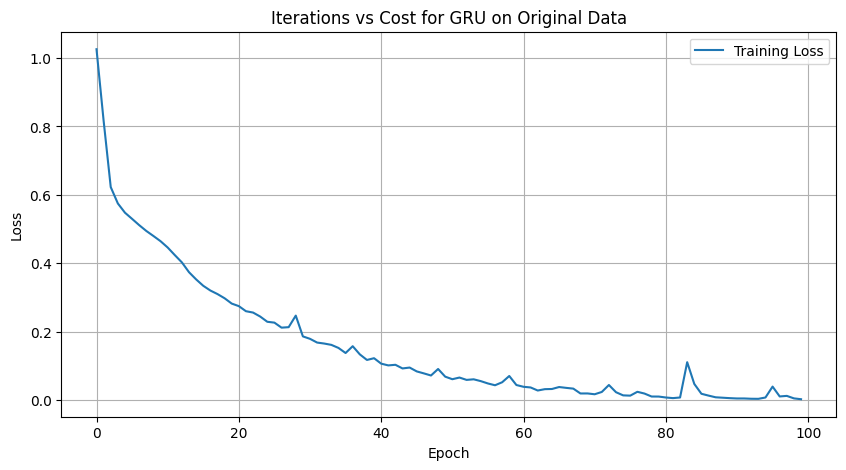

Confusion Matrix for GRU on Original Data :


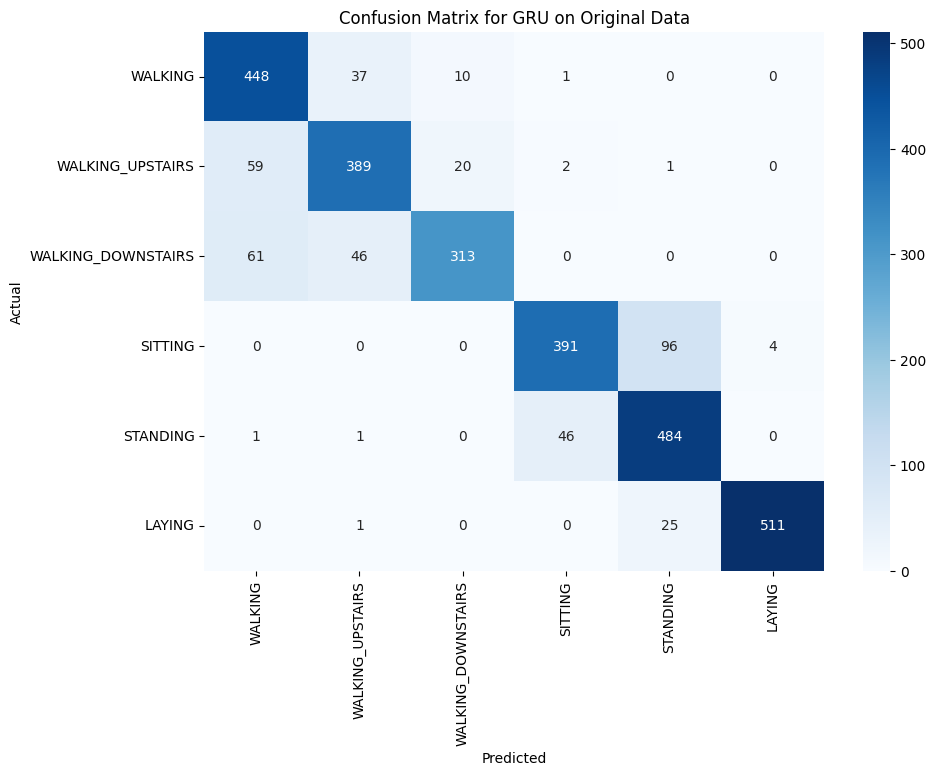

Classification Report GRU on Original Data:
                    precision    recall  f1-score   support

           WALKING       0.79      0.90      0.84       496
  WALKING_UPSTAIRS       0.82      0.83      0.82       471
WALKING_DOWNSTAIRS       0.91      0.75      0.82       420
           SITTING       0.89      0.80      0.84       491
          STANDING       0.80      0.91      0.85       532
            LAYING       0.99      0.95      0.97       537

          accuracy                           0.86      2947
         macro avg       0.87      0.86      0.86      2947
      weighted avg       0.87      0.86      0.86      2947

Mean Average Precision: 0.8986
Mean Average Recall: 0.8553

Class-wise Precision, Recall, and F1 Score:
Class 1 (WALKING): Precision: 0.7873, Recall: 0.9032, F1 Score: 0.8413
Class 2 (WALKING_UPSTAIRS): Precision: 0.8207, Recall: 0.8259, F1 Score: 0.8233
Class 3 (WALKING_DOWNSTAIRS): Precision: 0.9125, Recall: 0.7452, F1 Score: 0.8204
Class 4 (SITTING

<Figure size 800x1200 with 0 Axes>

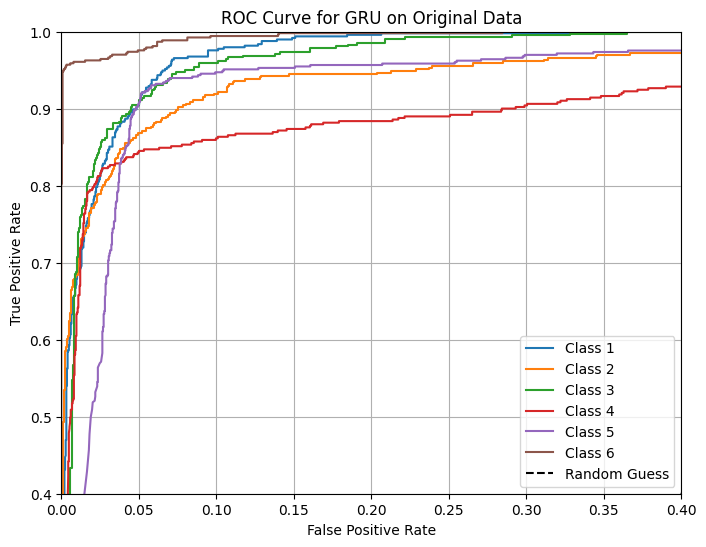

In [10]:




import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (roc_auc_score, confusion_matrix, classification_report,
                             average_precision_score, recall_score, precision_score,
                             f1_score, accuracy_score, roc_curve, auc)
from sklearn.preprocessing import label_binarize

def evaluate_model(y_test, y_pred, history,model_name='',datatype=''):

    y_test = y_test-1
    y_pred = np.array(y_pred)

    y_test_one_hot = label_binarize(y_test, classes=np.arange(num_classes))
    # Convert y_pred from probabilities to class labels
    y_pred_labels = np.argmax(y_pred, axis=1)
    # ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_pred, average='macro', multi_class='ovr')
    print(f'\nROC-AUC Score: {roc_auc:.4f}')

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred_labels)
    print(f'Accuracy Score: {accuracy:.4f}')

    # Plotting Iterations vs Cost
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Iterations vs Cost for {model_name} on {datatype}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_labels)
    print(f'Confusion Matrix for {model_name} on {datatype} :')
    labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name} on {datatype}')
    plt.show()

    # Classification Report (Precision, Recall, F1 Score)
    class_report = classification_report(y_test, y_pred_labels, target_names=labels)
    print(f'Classification Report {model_name} on {datatype}:')
    print(class_report)

    # Mean Average Precision and Recall
    avg_precision = average_precision_score(y_test_one_hot, y_pred, average='macro')
    avg_recall = recall_score(y_test, y_pred_labels, average='macro')
    print(f'Mean Average Precision: {avg_precision:.4f}')
    print(f'Mean Average Recall: {avg_recall:.4f}')

    # Class-wise Precision, Recall, and F1 Score
    precision = precision_score(y_test, y_pred_labels, average=None)
    recall = recall_score(y_test, y_pred_labels, average=None)
    f1 = f1_score(y_test, y_pred_labels, average=None)

    print('\nClass-wise Precision, Recall, and F1 Score:')
    for i, (p, r, f) in enumerate(zip(precision, recall, f1)):
        print(f'Class {i+1} ({labels[i]}): Precision: {p:.4f}, Recall: {r:.4f}, F1 Score: {f:.4f}')


    plt.figure(figsize=(8,12))
    n_classes = y_test_one_hot.shape[1]
    all_fpr = np.array([])
    all_tpr = np.array([])

    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_pred[:, i])
        plt.plot(fpr, tpr, label=f'Class {i+1}')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlim([0, 0.4])
    plt.ylim([0.4, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name} on {datatype}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


evaluate_model(yTest, y_pred, history_gru,'GRU','Original Data')

In [ ]:
dataTrain_pca = pd.read_csv('/content/content/MyDrive/harCopy/PCA_datasets/PCA_data.csv')
dataTest_pca = pd.read_csv('/content/content/MyDrive/harCopy/PCA_datasets/data_pcaTest.csv')

In [ ]:
history_pca = model_gru.fit(dataTrain_pca, yTrain_onehot, epochs=100, batch_size=32)
y_pred_pca = model_gru.predict(dataTest_pca)


Epoch 1/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2490 - loss: 2.6975
Epoch 2/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4473 - loss: 1.1820
Epoch 3/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6980 - loss: 0.6947
Epoch 4/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7459 - loss: 0.5837
Epoch 5/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7623 - loss: 0.5496
Epoch 6/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7752 - loss: 0.5131
Epoch 7/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7940 - loss: 0.4775
Epoch 8/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8230 - loss: 0.4199
Epoch 9/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8325 - loss: 0.3982
Epoch 10/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8463 - loss: 0.3679
Epoch 11/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8506 - loss: 0.3564
Epoch 12/100
230/230 ━━━━━━━━━━━━━━━━


ROC-AUC Score: 0.9688
Accuracy Score: 0.8134


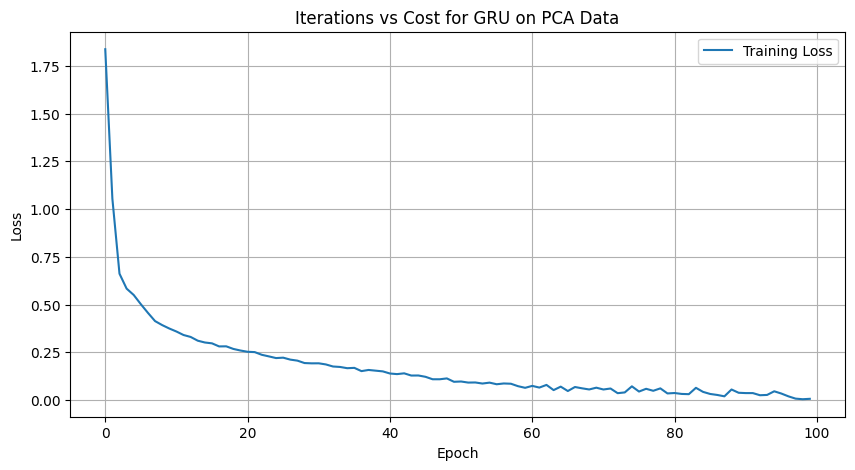

Confusion Matrix for GRU on PCA Data :


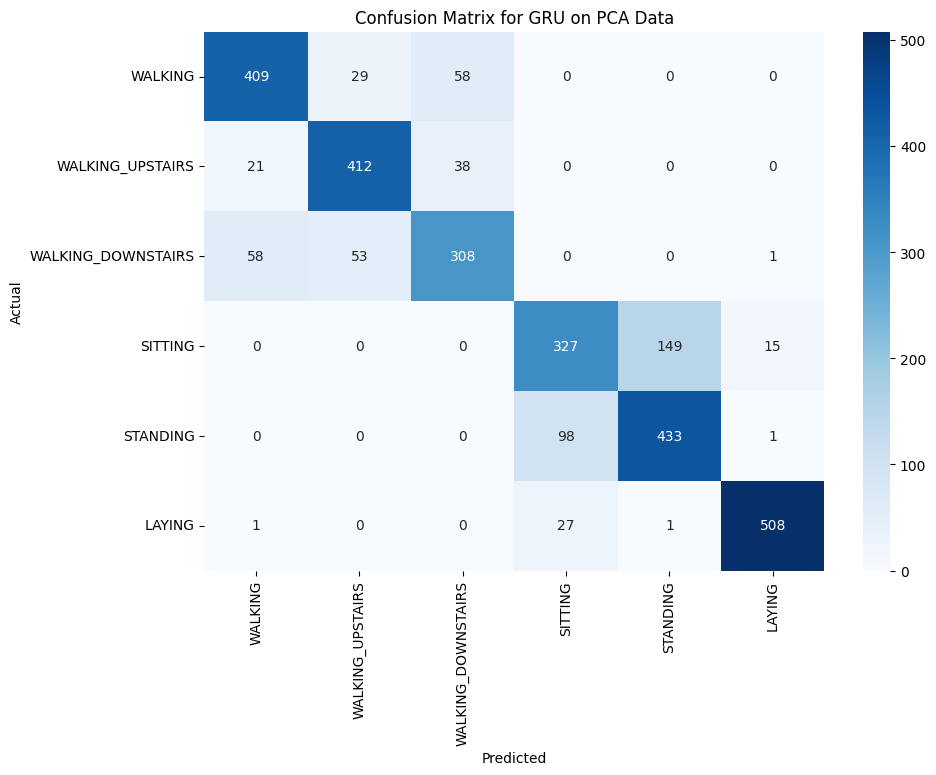

Classification Report GRU on PCA Data:
                    precision    recall  f1-score   support

           WALKING       0.84      0.82      0.83       496
  WALKING_UPSTAIRS       0.83      0.87      0.85       471
WALKING_DOWNSTAIRS       0.76      0.73      0.75       420
           SITTING       0.72      0.67      0.69       491
          STANDING       0.74      0.81      0.78       532
            LAYING       0.97      0.95      0.96       537

          accuracy                           0.81      2947
         macro avg       0.81      0.81      0.81      2947
      weighted avg       0.81      0.81      0.81      2947

Mean Average Precision: 0.8695
Mean Average Recall: 0.8098

Class-wise Precision, Recall, and F1 Score:
Class 1 (WALKING): Precision: 0.8364, Recall: 0.8246, F1 Score: 0.8305
Class 2 (WALKING_UPSTAIRS): Precision: 0.8340, Recall: 0.8747, F1 Score: 0.8539
Class 3 (WALKING_DOWNSTAIRS): Precision: 0.7624, Recall: 0.7333, F1 Score: 0.7476
Class 4 (SITTING): Pr

<Figure size 800x1200 with 0 Axes>

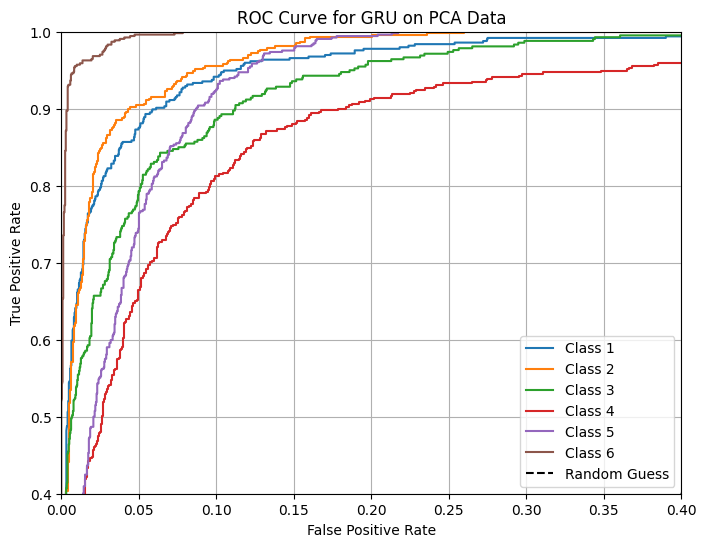

In [ ]:
evaluate_model(yTest, y_pred_pca, history_pca,'GRU','PCA Data')

In [ ]:

dataTest_rfecv = pd.read_csv('/content/content/MyDrive/harCopy/RFECV_datasets/dataTest_rfecv.csv')
dataTrain_rfecv = pd.read_csv('/content/content/MyDrive/harCopy/RFECV_datasets/data_rfecv.csv')

In [ ]:
history_rfecv = model_gru.fit(dataTrain_rfecv, yTrain_onehot, epochs=100, batch_size=32)
y_pred_rfecv = model_gru.predict(dataTest_rfecv)


Epoch 1/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6684 - loss: 1.7271
Epoch 2/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8849 - loss: 0.2997
Epoch 3/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9055 - loss: 0.2388
Epoch 4/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9338 - loss: 0.1748
Epoch 5/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9385 - loss: 0.1556
Epoch 6/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9388 - loss: 0.1694
Epoch 7/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9428 - loss: 0.1366
Epoch 8/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9556 - loss: 0.1127
Epoch 9/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9584 - loss: 0.1111
Epoch 10/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9621 - loss: 0.0989
Epoch 11/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9615 - loss: 0.0926
Epoch 12/100
230/230 ━━━━━━━━━


ROC-AUC Score: 0.9744
Accuracy Score: 0.8588


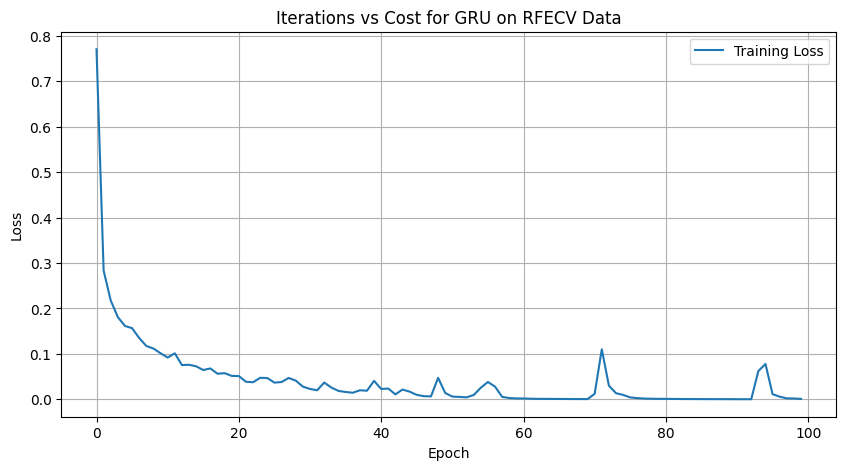

Confusion Matrix for GRU on RFECV Data :


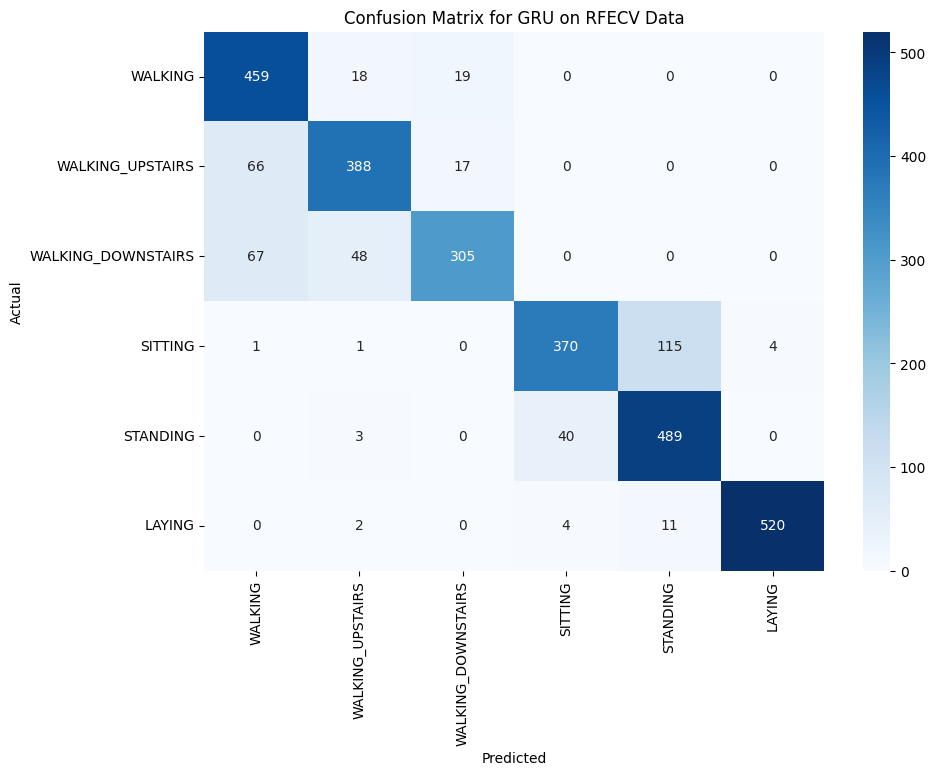

Classification Report GRU on RFECV Data:
                    precision    recall  f1-score   support

           WALKING       0.77      0.93      0.84       496
  WALKING_UPSTAIRS       0.84      0.82      0.83       471
WALKING_DOWNSTAIRS       0.89      0.73      0.80       420
           SITTING       0.89      0.75      0.82       491
          STANDING       0.80      0.92      0.85       532
            LAYING       0.99      0.97      0.98       537

          accuracy                           0.86      2947
         macro avg       0.87      0.85      0.85      2947
      weighted avg       0.87      0.86      0.86      2947

Mean Average Precision: 0.9002
Mean Average Recall: 0.8527

Class-wise Precision, Recall, and F1 Score:
Class 1 (WALKING): Precision: 0.7740, Recall: 0.9254, F1 Score: 0.8430
Class 2 (WALKING_UPSTAIRS): Precision: 0.8435, Recall: 0.8238, F1 Score: 0.8335
Class 3 (WALKING_DOWNSTAIRS): Precision: 0.8944, Recall: 0.7262, F1 Score: 0.8016
Class 4 (SITTING): 

<Figure size 800x1200 with 0 Axes>

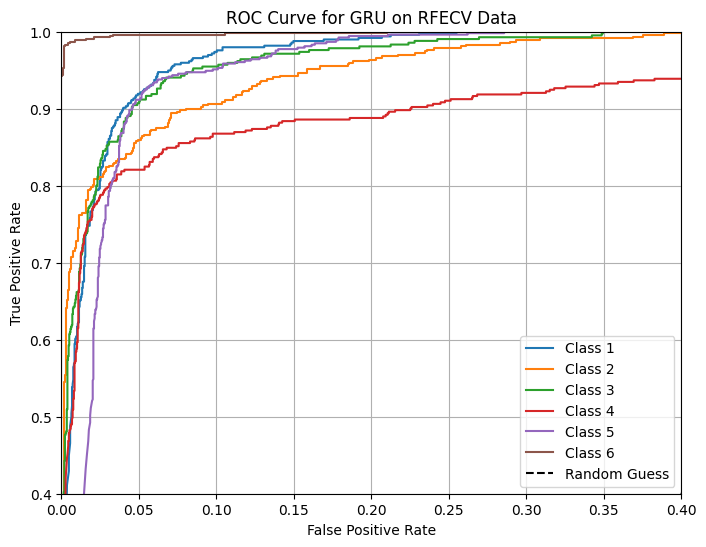

In [ ]:


evaluate_model(yTest, y_pred_rfecv, history_rfecv,'GRU', 'RFECV Data')

In [ ]:
import matplotlib.pyplot as plt

# Data
datasets = ['Original Data','Data PCA', 'DATA RFECV']



# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# accuracy scores
color = 'tab:blue'
ax1.set_xlabel('Datasets', fontsize=14)
ax1.set_ylabel('Accuracy Score', color=color, fontsize=14)
bars = ax1.bar(datasets, accuracies, color=color, alpha=0.7, edgecolor='black', label='Accuracy Score')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# a second y-axis to plot ROC-AUC scores
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('ROC-AUC Score', color=color, fontsize=14)
line = ax2.plot(datasets, roc_auc_scores, color=color, marker='o', linestyle='-', linewidth=2, markersize=8, label='ROC-AUC Score')
ax2.tick_params(axis='y', labelcolor=color)

#  titles, legends, and plot
fig.suptitle('Dataset vs Accuracy and ROC-AUC Scores', fontsize=16)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()


In [ ]:
import os
os.getcwd()

In [ ]:
os.listdir()

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Change mountpoint to '/content/drive'
import os
os.chdir('/content/drive/MyDrive') # Update path to reflect the new mountpoint

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install openpyxl xlsxwriter


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 4.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf

strategy = tf.distribute.MirroredStrategy()
print(f"Using {strategy.num_replicas_in_sync} device(s): {tf.config.list_physical_devices('GPU')}")


Using 1 device(s): [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from google.colab import drive
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, GRU
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import (roc_auc_score, confusion_matrix, classification_report,
                             average_precision_score, recall_score, precision_score,
                             f1_score, accuracy_score, roc_curve)
from sklearn.preprocessing import label_binarize
from keras.layers import BatchNormalization



# Load Data
dataTest = pd.read_csv('/content/content/MyDrive/harCopy/og data/test.csv')
dataTrain = pd.read_csv('/content/content/MyDrive/harCopy/og data/train.csv')
yTrain = pd.read_csv('/content/content/MyDrive/harCopy/y.csv')
yTest = pd.read_csv('/content/content/MyDrive/harCopy/y_test.csv')

yTrain  = yTrain.iloc[:,1]
yTest = yTest.iloc[:,1]
num_classes = yTrain.value_counts().shape[0]

onehot = lambda Y: to_categorical(Y - 1, num_classes=num_classes)
yTrain_onehot = onehot(yTrain)
yTest_onehot = onehot(yTest)

# Hyperparameter Search
learning_rates = [0.001, 0.01, 0.1]  # Change as needed
hidden_units_list = [8, 16, 24, 32]  # Change as needed

# Results storage
results = []

# Evaluation Function
def evaluate_model(y_test, y_pred, history, learning_rate, hidden_units):
    y_test = y_test - 1
    y_pred = np.array(y_pred)

    y_test_one_hot = label_binarize(y_test, classes=np.arange(num_classes))
    y_pred_labels = np.argmax(y_pred, axis=1)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred_labels)
    roc_auc = roc_auc_score(y_test_one_hot, y_pred, average='macro', multi_class='ovr')
    precision = precision_score(y_test, y_pred_labels, average=None)
    recall = recall_score(y_test, y_pred_labels, average=None)
    f1 = f1_score(y_test, y_pred_labels, average=None)

    # Save Metrics
    results.append({
        "learning_rate": learning_rate,
        "hidden_units": hidden_units,
        "accuracy": accuracy,
        "roc_auc": roc_auc,
        "precision": list(precision),
        "recall": list(recall),
        "f1": list(f1)
    })

# Training and Evaluation Loop
for lr in learning_rates:
    for units in hidden_units_list:
        print(f"Training GRU with {units} hidden units and learning rate {lr}...")

        # Build Model
        model_gru = Sequential()
        model_gru.add(GRU(units, input_shape=(dataTrain.shape[1], 1)))
        model_gru.add(BatchNormalization())
        model_gru.add(Dense(32, activation='relu'))
        model_gru.add(BatchNormalization())
        model_gru.add(Dense(num_classes, activation='softmax'))

        # Compile Model
        optimizer = Adam(learning_rate=lr, clipvalue = 1.0)
        model_gru.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        # Train Model
        history_gru = model_gru.fit(dataTrain, yTrain_onehot, epochs=10, batch_size=32, verbose=0)

        # Predict and Evaluate
        y_pred = model_gru.predict(dataTest)
        evaluate_model(yTest, y_pred, history_gru, lr, units)

# Save Results to Excel
results_df = pd.DataFrame(results)
results_df[['precision', 'recall', 'f1']] = results_df[['precision', 'recall', 'f1']].applymap(lambda x: ', '.join(map(str, x)))
results_df.to_excel("GRU_Hyperparameter_Results.xlsx", index=False)
print("Results saved to GRU_Hyperparameter_Results.xlsx")

# Optional: Download File
from google.colab import files
files.download("GRU_Hyperparameter_Results.xlsx")


Training GRU with 8 hidden units and learning rate 0.001...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Training GRU with 16 hidden units and learning rate 0.001...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Training GRU with 24 hidden units and learning rate 0.001...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Training GRU with 32 hidden units and learning rate 0.001...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Training GRU with 8 hidden units and learning rate 0.01...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Training GRU with 16 hidden units and learning rate 0.01...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Training GRU with 24 hidden units and learning rate 0.01...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Training GRU with 32 hidden units and learning rate 0.01...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Training GRU with 8 hidden units and learning rate 0.1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Training GRU with 16 hidden units and learning rate 0.1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Training GRU with 24 hidden units and learning rate 0.1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Training GRU with 32 hidden units and learning rate 0.1...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-21-50120f974cdb>:92: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results_df[['precision', 'recall', 'f1']] = results_df[['precision', 'recall', 'f1']].applymap(lambda x: ', '.join(map(str, x)))


Results saved to GRU_Hyperparameter_Results.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('content')

Mounted at content


In [ ]:
from google.colab import drive
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import Dense, Dropout, BatchNormalization, SimpleRNN
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

  # Update the path as needed

# Load Data
dataTest = pd.read_csv('/content/content/MyDrive/harCopy/og data/test.csv')
dataTrain = pd.read_csv('/content/content/MyDrive/harCopy/og data/train.csv')
yTrain = pd.read_csv('/content/content/MyDrive/harCopy/y.csv')
yTest = pd.read_csv('/content/content/MyDrive/harCopy/y_test.csv')

yTrain  = yTrain.iloc[:,1]
yTest = yTest.iloc[:,1]

# Number of classes
num_classes = yTrain.value_counts().shape[0]

# Convert labels to one-hot encoding
onehot = lambda Y: to_categorical(Y - 1, num_classes=num_classes)
yTrain_onehot = onehot(yTrain)
yTest_onehot = onehot(yTest)

# Normalize input data
dataTrain = (dataTrain - dataTrain.mean()) / dataTrain.std()
dataTest = (dataTest - dataTest.mean()) / dataTest.std()

# Reshape input data for RNN
dataTrain = np.expand_dims(dataTrain.values, axis=-1)
dataTest = np.expand_dims(dataTest.values, axis=-1)

# Hyperparameter Search
learning_rates = [0.001, 0.01, 0.1]  # Test different learning rates
hidden_units_list = [8,16,24,32]     # Test different numbers of RNN hidden units

# Store results
results = []

# Evaluation Function
def evaluate_model(y_test, y_pred, learning_rate, hidden_units):
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_test_labels = y_test - 1

    # Metrics
    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    precision = precision_score(y_test_labels, y_pred_labels, average=None, zero_division=0)
    recall = recall_score(y_test_labels, y_pred_labels, average=None, zero_division=0)
    f1 = f1_score(y_test_labels, y_pred_labels, average=None, zero_division=0)

    # Save Metrics
    results.append({
        "learning_rate": learning_rate,
        "hidden_units": hidden_units,
        "accuracy": accuracy,
        "precision": list(precision),
        "recall": list(recall),
        "f1": list(f1)
    })

# Training and Evaluation Loop
for lr in learning_rates:
    for units in hidden_units_list:
        print(f"Training RNN with {units} hidden units and learning rate {lr}...")

        try:
            # Build Model with Batch Normalization
            model_rnn = Sequential()
            model_rnn.add(SimpleRNN(units, input_shape=(dataTrain.shape[1], 1)))
            model_rnn.add(BatchNormalization())  # Add Batch Normalization
            model_rnn.add(Dropout(0.5))
            model_rnn.add(Dense(32, activation='relu'))
            model_rnn.add(BatchNormalization())  # Add Batch Normalization
            model_rnn.add(Dense(num_classes, activation='softmax'))

            # Compile Model
            optimizer = Adam(learning_rate=lr)
            model_rnn.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

            # Train Model
            history_rnn = model_rnn.fit(dataTrain, yTrain_onehot, epochs=10, batch_size=32, verbose=0)

            # Predict and Evaluate
            y_pred = model_rnn.predict(dataTest)
            evaluate_model(yTest, y_pred, lr, units)

        except Exception as e:
            print(f"Error for learning_rate={lr}, hidden_units={units}: {e}. Skipping this configuration.")
            continue

# Save Results to Excel
results_df = pd.DataFrame(results)
results_df[['precision', 'recall', 'f1']] = results_df[['precision', 'recall', 'f1']].applymap(lambda x: ', '.join(map(str, x)))
results_df.to_excel("RNN_Hyperparameter_Results.xlsx", index=False)
print("Results saved to RNN_Hyperparameter_Results.xlsx")

# Optional: Download File
from google.colab import files
files.download("RNN_Hyperparameter_Results.xlsx")


Training RNN with 8 hidden units and learning rate 0.001...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
Training RNN with 16 hidden units and learning rate 0.001...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
Training RNN with 24 hidden units and learning rate 0.001...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
Training RNN with 32 hidden units and learning rate 0.001...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
Training RNN with 8 hidden units and learning rate 0.01...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
Training RNN with 16 hidden units and learning rate 0.01...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
Training RNN with 24 hidden units and learning rate 0.01...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
Training RNN with 32 hidden units and learning rate 0.01...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step
Training RNN with 8 hidden units and learning rate 0.1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
Training RNN with 16 hidden units and learning rate 0.1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
Training RNN with 24 hidden units and learning rate 0.1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
Training RNN with 32 hidden units and learning rate 0.1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step


<ipython-input-3-283693634652>:100: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results_df[['precision', 'recall', 'f1']] = results_df[['precision', 'recall', 'f1']].applymap(lambda x: ', '.join(map(str, x)))


Results saved to RNN_Hyperparameter_Results.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# # Mount Google Drive
# drive.mount('/content/drive')
# os.chdir('/content/drive/MyDrive/HAR')  # Update the path to your data folder

dataTest = pd.read_csv('/content/content/MyDrive/harCopy/og data/test.csv')
dataTrain = pd.read_csv('/content/content/MyDrive/harCopy/og data/train.csv')
yTrain = pd.read_csv('/content/content/MyDrive/harCopy/y.csv')
yTest = pd.read_csv('/content/content/MyDrive/harCopy/y_test.csv')

yTrain  = yTrain.iloc[:,1]
yTest = yTest.iloc[:,1]

# Number of classes
num_classes = yTrain.value_counts().shape[0]

# Convert labels to one-hot encoding
onehot = lambda Y: to_categorical(Y - 1, num_classes=num_classes)
yTrain_onehot = onehot(yTrain)
yTest_onehot = onehot(yTest)

# Normalize input data
dataTrain = (dataTrain - dataTrain.mean()) / dataTrain.std()
dataTest = (dataTest - dataTest.mean()) / dataTest.std()

# Reshape input data for LSTM
dataTrain = np.expand_dims(dataTrain.values, axis=-1)
dataTest = np.expand_dims(dataTest.values, axis=-1)

# Hyperparameter Search
learning_rates = [0.001, 0.01, 0.1]  # Test different learning rates
hidden_units_list = [8,16, 24,32]     # Test different numbers of LSTM hidden units

# Store results
results = []

# Evaluation Function
def evaluate_model(y_test, y_pred, learning_rate, hidden_units):
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_test_labels = y_test - 1

    # Metrics
    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    precision = precision_score(y_test_labels, y_pred_labels, average=None, zero_division=0)
    recall = recall_score(y_test_labels, y_pred_labels, average=None, zero_division=0)
    f1 = f1_score(y_test_labels, y_pred_labels, average=None, zero_division=0)

    # Save Metrics
    results.append({
        "learning_rate": learning_rate,
        "hidden_units": hidden_units,
        "accuracy": accuracy,
        "precision": list(precision),
        "recall": list(recall),
        "f1": list(f1)
    })

# Training and Evaluation Loop
for lr in learning_rates:
    for units in hidden_units_list:
        print(f"Training LSTM with {units} hidden units and learning rate {lr}...")

        try:
            # Build Model with Batch Normalization
            model = Sequential()
            model.add(LSTM(units, input_shape=(dataTrain.shape[1], 1)))
            model.add(BatchNormalization())  # Add Batch Normalization
            model.add(Dropout(0.5))
            model.add(Dense(32, activation='relu'))
            model.add(BatchNormalization())  # Add Batch Normalization
            model.add(Dense(num_classes, activation='softmax'))

            # Compile Model
            optimizer = Adam(learning_rate=lr)
            model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

            # Train Model
            history = model.fit(dataTrain, yTrain_onehot, epochs=10, batch_size=32, verbose=0)

            # Predict and Evaluate
            y_pred = model.predict(dataTest)
            evaluate_model(yTest, y_pred, lr, units)

        except Exception as e:
            print(f"Error for learning_rate={lr}, hidden_units={units}: {e}. Skipping this configuration.")
            continue

# Save Results to Excel
results_df = pd.DataFrame(results)
results_df[['precision', 'recall', 'f1']] = results_df[['precision', 'recall', 'f1']].applymap(lambda x: ', '.join(map(str, x)))
results_df.to_excel("LSTM_Hyperparameter_Results.xlsx", index=False)
print("Results saved to LSTM_Hyperparameter_Results.xlsx")

# Optional: Download File
from google.colab import files
files.download("LSTM_Hyperparameter_Results.xlsx")


Training LSTM with 8 hidden units and learning rate 0.001...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step
Training LSTM with 16 hidden units and learning rate 0.001...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step
Training LSTM with 24 hidden units and learning rate 0.001...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step
Training LSTM with 32 hidden units and learning rate 0.001...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step
Training LSTM with 8 hidden units and learning rate 0.01...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step
Training LSTM with 16 hidden units and learning rate 0.01...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step
Training LSTM with 24 hidden units and learning rate 0.01...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step
Training LSTM with 32 hidden units and learning rate 0.01...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step
Training LSTM with 8 hidden units and learning rate 0.1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step
Training LSTM with 16 hidden units and learning rate 0.1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
